### Бета-распределение

$Beta(a, b)$ — бета-распределение.

> **Бета-распределение** — это непрерывное распределение вероятностей, определенное на интервале $[0, 1]$. Оно используется для моделирования случайных величин, представляющих собой доли или вероятности. Например, оно может описывать неопределенность в вероятности успеха в серии испытаний или долю времени, затраченного на выполнение задачи.

**Формула плотности бета-распределения:**

$$
f(x, a, b) = \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} x^{a-1}(1 - x)^{b-1}, \quad 0 \le x \le 1, \; a > 0, \; b > 0
$$

где $\Gamma$ — гамма-функция.

---

**Параметры бета-распределения `scipy.stats.beta` в `scipy.stats`:**

*   `a` — первый параметр формы. Он влияет на "смещение" и форму распределения. При `a < b` распределение смещено вправо (мода больше 0.5), при `a > b` — влево (мода меньше 0.5). При `a = b` распределение симметрично относительно 0.5.
*   `b` — второй параметр формы. Влияет на форму кривой аналогично `a`.
*   По умолчанию `loc=0`, `scale=1`. Параметры `loc` и `scale` можно использовать для сдвига и масштабирования распределения на любой интервал `[loc, loc+scale]`.

**Свойства распределения:**

*   математическое ожидание: $\frac{a}{a+b}$,
*   дисперсия: $\frac{ab}{(a+b)^2(a+b+1)}$.rac{ab}{(a+b)^2(a+b+1)}$.

In [5]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import ipywidgets as widgets

plt.style.use("default")

In [6]:
def show_pdf(pdf, xmin, xmax, grid_size, distr_name, **kwargs):
    """
    Рисует график плотности непрерывного распределения

    pdf - плотность
    xmin, xmax - границы графика по оси x
    grid_size - размер сетки, по которой рисуется график
    distr_name - название распределения
    kwargs - параметры плотности
    """
    X = np.linspace(xmin, xmax, grid_size)
    Y = pdf(X, **kwargs)
    ymax = max(Y) + 0.1
    plt.figure(figsize=(6, 3))
    plt.plot(X, Y, lw=5)
    plt.grid(ls=':')
    plt.xlabel('Значение', fontsize=10)
    plt.ylabel('Плотность', fontsize=10)
    plt.xlim((xmin, xmax))
    plt.ylim((-0.05, ymax))
    title = 'Плотность {}'.format(distr_name)
    plt.title(title.format(**kwargs), fontsize=14)
    plt.show()

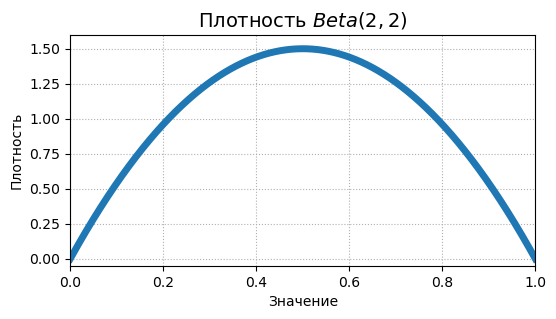

In [7]:
show_pdf(
    pdf=sts.beta.pdf, 
    xmin=0, 
    xmax=1, 
    grid_size=10000,
    distr_name=r'$Beta(2, 2)$', 
    a=2, 
    b=2
)

In [10]:
# создать виджет, но не отображать его
ip = widgets.interactive(
    show_pdf,
    pdf=widgets.fixed(sts.beta.pdf),
    grid_size=widgets.IntSlider(min=25, max=300, step=25, value=100, description='$grid\\_size$'),
    xmin=widgets.FloatSlider(min=0, max=1, step=0.05, value=0, description='$x_{min}=$'),
    xmax=widgets.FloatSlider(min=0, max=1, step=0.05, value=1, description='$x_{max}=$'),
    a=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2, description='$a=$'),
    b=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2, description='$b=$'),
    distr_name=r'$Beta({a:.2f}, {b:.2f})$'
);

# отображаем слайдеры группами
display(widgets.VBox(ip.children[:2] + ip.children[4:]))

ip.update() # чтобы функция запустилась до первого изменения слайдеров

In [11]:
def plot_beta(a=2, b=2, n_points=10000):
    """
    отрисовывает распределение случайных точек по бета-закону
    a, b - параметры формы
    n_points - число наблюдений в выборке
    """
    plt.figure(figsize=(6, 3))
    sample = sts.beta.rvs(a=a, b=b, size=n_points) # генерация выборки
    plt.hist(sample, bins=30, density=True, alpha=0.6, label='Гистограмма выборки')
    
    grid = np.linspace(0, 1, n_points) # сетка для построения графика
    plt.plot(grid, sts.beta.pdf(grid, a, b), color='red', lw=3, label='Плотность случайной величины')
    
    plt.title(r'Случайная величина $X \sim \mathcal{B}eta(a, b)$', fontsize=14)
    plt.legend(fontsize=10, loc=8)
    plt.grid(ls=':')
    plt.show()
    
    print(f'Математическое ожидание: {round(sample.mean(), 3)}, а по формуле: {round(a / (a + b), 3)}')
    print(f'Дисперсия: {round(sample.var(), 3)}, а по формуле: {round((a * b) / ((a + b)**2 * (a + b + 1)), 3)}')

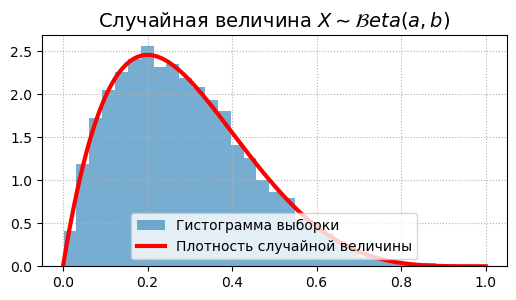

Математическое ожидание: 0.285, а по формуле: 0.286
Дисперсия: 0.025, а по формуле: 0.026


In [12]:
plot_beta(2, 5, 10000)

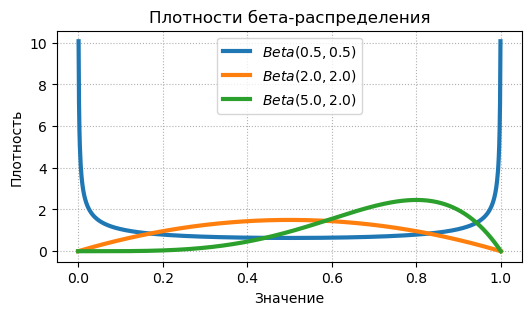

In [13]:
# Сравнение графиков плотностей

grid = np.linspace(0, 1, 1000)  # сетка для построения графика
a_values = [0.5, 2, 5]         # набор значений параметра a
b_values = [0.5, 2, 2]         # набор значений параметра b

plt.figure(figsize=(6, 3))
for i, (a, b) in enumerate(zip(a_values, b_values)):
    plt.plot(grid, sts.beta.pdf(grid, a, b), lw=3,
             label=r'$Beta({:.1f}, {:.1f})$'.format(a, b))

plt.legend(fontsize=10)
plt.title('Плотности бета-распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(ls=':')
plt.show()

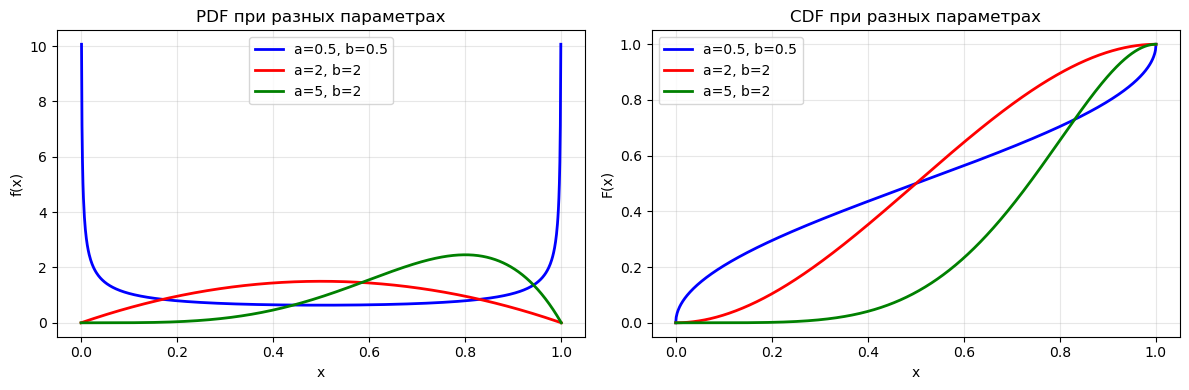

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

# Разные параметры формы a и b
a_values = [0.5, 2, 5]
b_values = [0.5, 2, 2]
colors = ['blue', 'red', 'green']

x = np.linspace(0, 1, 1000)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for a, b, color in zip(a_values, b_values, colors):
    pdf = beta.pdf(x, a, b)
    plt.plot(x, pdf, color=color, linewidth=2,
             label=f'a={a}, b={b}')
plt.title('PDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for a, b, color in zip(a_values, b_values, colors):
    cdf = beta.cdf(x, a, b)
    plt.plot(x, cdf, color=color, linewidth=2,
             label=f'a={a}, b={b}')
plt.title('CDF при разных параметрах')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()